Get the modules ready.

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
%pip install chardet

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Load the song data from CSV.

In [5]:
address = "./19332_Spotify_Songs.csv"

In [6]:
import pandas as pd
import chardet

# with open(address, 'rb') as f:
#     result = chardet.detect(f.read(1000000))

# encoding = result['encoding']
# print(f"Detected encoding: {encoding}")


In [7]:

df = pd.read_csv(address, encoding="MacRoman")

C:\Users\zaqho\AppData\Local\Temp\ipykernel_12688\3368478603.py:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(address, encoding="MacRoman")


In [8]:
df.head()

,id,artists,available_markets,disc_number,duration_ms.x,explicit,href,is_local,name,popularity,...,instrumentalness,liveness,valence,tempo,type.y,uri.y,track_href,analysis_url,duration_ms.y,time_signature
0,000xQL6tZNLJzIrtIgxqSl,https://api.spotify.com/v1/artists/5ZsFI1h6hId...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,188490,FALSE,https://api.spotify.com/v1/tracks/000xQL6tZNLJ...,FALSE,Still Got Time (feat. PARTYNEXTDOOR),63,...,0.000000,0.0852,0.524,120.963,audio_features,spotify:track:000xQL6tZNLJzIrtIgxqSl,https://api.spotify.com/v1/tracks/000xQL6tZNLJ...,https://api.spotify.com/v1/audio-analysis/000x...,188491.0,4.0
1,001UkMQHw4zXfFNdKpwXAF,https://api.spotify.com/v1/artists/0XKOBt59crn...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,191053,FALSE,https://api.spotify.com/v1/tracks/001UkMQHw4zX...,FALSE,Brand New Man - with Luke Combs,68,...,0.000079,0.2900,0.562,127.061,audio_features,spotify:track:001UkMQHw4zXfFNdKpwXAF,https://api.spotify.com/v1/tracks/001UkMQHw4zX...,https://api.spotify.com/v1/audio-analysis/001U...,191053.0,4.0
2,003FTlCpBTM4eSqYSWPv4H,https://api.spotify.com/v1/artists/3vAaWhdBR38...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,233266,FALSE,https://api.spotify.com/v1/tracks/003FTlCpBTM4...,FALSE,"Swing, Swing",67,...,0.128000,0.0385,0.318,127.947,audio_features,spotify:track:003FTlCpBTM4eSqYSWPv4H,https://api.spotify.com/v1/tracks/003FTlCpBTM4...,https://api.spotify.com/v1/audio-analysis/003F...,233267.0,4.0
3,003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/artists/0C0XlULifJt...,"AD, AE, AL, AR, AT, AU, BA, BE, BG, BH, BO, BR...",1,222973,FALSE,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,FALSE,Mr. Brightside,80,...,0.000000,0.0995,0.236,148.033,audio_features,spotify:track:003vvx7Niy0yvhvHt4a68B,https://api.spotify.com/v1/tracks/003vvx7Niy0y...,https://api.spotify.com/v1/audio-analysis/003v...,222973.0,4.0
4,005lwxGU1tms6HGELIcUv9,https://api.spotify.com/v1/artists/6jJ0s89eD6G...,"CA, JP, US",1,179640,FALSE,https://api.spotify.com/v1/tracks/005lwxGU1tms...,FALSE,I Kissed A Girl,68,...,0.000000,0.1320,0.696,129.996,audio_features,spotify:track:005lwxGU1tms6HGELIcUv9,https://api.spotify.com/v1/tracks/005lwxGU1tms...,https://api.spotify.com/v1/audio-analysis/005l...,179640.0,4.0


In [9]:
list(df.columns)
new_df = df

Add a column for song links

In [10]:
new_df.insert(loc=0, column='song_link', value="")

In [11]:

for i in range(len(new_df['href'])):
    try:
        cur_id = df.loc[i, 'id']
        if type(cur_id) is not float:
            new_df.loc[i, 'song_link'] = "https://open.spotify.com/track/" + cur_id
    except:
        print(f"at index {i}, there was an error.")

Add proper year column

In [12]:
try:
    new_df.insert(loc=2, column='release_year', value=-0)
except ValueError:
    pass

In [13]:
for i in range(len(new_df['album.release_date'])):
    try:
        cur_release_date = df.loc[i, 'album.release_date']
        if type(cur_release_date) is str:
            new_df.loc[i, 'release_year'] = int(cur_release_date[:4])
    except:
        print(f"at index {i}, there was an error.")


at index 7399, there was an error.
at index 12600, there was an error.
at index 16651, there was an error.


I actually don't get why there was error.

Fix popularity

In [14]:
new_df = new_df.dropna()
new_df['popularity'] = new_df['popularity'].astype(dtype=float)

C:\Users\zaqho\AppData\Local\Temp\ipykernel_12688\4111341485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['popularity'] = new_df['popularity'].astype(dtype=float)


Remove unnecessary columns.

In [15]:
new_df.columns

Index(['song_link', 'id', 'release_year', 'artists', 'available_markets',
       'disc_number', 'duration_ms.x', 'explicit', 'href', 'is_local', 'name',
       'popularity', 'preview_url', 'track_number', 'type.x', 'uri.x',
       'album.album_type', 'album.artists', 'album.available_markets',
       'album.href', 'album.id', 'album.images', 'album.name',
       'album.release_date', 'album.release_date_precision',
       'album.total_tracks', 'album.type', 'album.uri',
       'album.external_urls.spotify', 'external_ids.isrc',
       'external_urls.spotify', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'type.y', 'uri.y', 'track_href', 'analysis_url',
       'duration_ms.y', 'time_signature'],
      dtype='object')

In [16]:
for label in ['album.album_type', 'album.artists', 'album.available_markets', 'album.external_urls.spotify', 'album.href', 'album.id', 'album.images',
              'album.name', 'album.release_date', 'album.release_date_precision', 'album.total_tracks', 'album.type', 'album.uri', 'analysis_url', 'artists',
              'available_markets', 'disc_number', 'duration_ms.y', 'external_ids.isrc', 'external_urls.spotify', 'href', 'is_local', 'preview_url', 'track_href',
              'track_number', 'type.x', 'type.y', 'uri.x', 'uri.y']:
    try:
        new_df = new_df.drop(columns=label)
    except KeyError:
        pass



In [17]:
new_df.columns

Index(['song_link', 'id', 'release_year', 'duration_ms.x', 'explicit', 'name',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [18]:
new_df = new_df.dropna()
new_df

,song_link,id,release_year,duration_ms.x,explicit,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,https://open.spotify.com/track/000xQL6tZNLJzIr...,000xQL6tZNLJzIrtIgxqSl,2017,188490,FALSE,Still Got Time (feat. PARTYNEXTDOOR),63.0,0.748,0.627,7.0,-6.029,1.0,0.0639,0.13100,0.000000,0.0852,0.5240,120.963,4.0
1,https://open.spotify.com/track/001UkMQHw4zXfFN...,001UkMQHw4zXfFNdKpwXAF,2019,191053,FALSE,Brand New Man - with Luke Combs,68.0,0.573,0.846,7.0,-4.866,1.0,0.0344,0.00372,0.000079,0.2900,0.5620,127.061,4.0
5,https://open.spotify.com/track/007EFIByaEW4dgE...,007EFIByaEW4dgEcIbfBg9,2018,170626,FALSE,Hasta Que un d√≠,58.0,0.684,0.564,10.0,-6.852,1.0,0.0297,0.42500,0.000000,0.1520,0.3680,134.958,4.0
7,https://open.spotify.com/track/009thiR2SWpG6jX...,009thiR2SWpG6jXqXYX2AT,2020,152784,FALSE,Cuantas Amantes,53.0,0.754,0.169,4.0,-14.999,0.0,0.0540,0.96500,0.872000,0.1140,0.4220,93.952,4.0
8,https://open.spotify.com/track/00bOuKgzbRkOHmg...,00bOuKgzbRkOHmgCAL7ChZ,2019,271680,FALSE,Zoning,50.0,0.629,0.877,7.0,-4.642,1.0,0.0402,0.02890,0.408000,0.1060,0.0369,104.978,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19328,https://open.spotify.com/track/7zTTDkkLkJ2iHAq...,7zTTDkkLkJ2iHAqq1daDCr,2019,226005,FALSE,OUTTA MY MIND,64.0,0.689,0.463,2.0,-8.121,0.0,0.0365,0.06600,0.000152,0.1450,0.8640,86.998,4.0
19330,https://open.spotify.com/track/7zVCrzzEJU7u24s...,7zVCrzzEJU7u24sbJPXA5W,2016,188253,FALSE,What Ifs (feat. Lauren Alaina),74.0,0.612,0.799,10.0,-4.603,1.0,0.0275,0.00898,0.000000,0.1720,0.6870,125.976,4.0
19331,https://open.spotify.com/track/7zwn1eykZtZ5LOD...,7zwn1eykZtZ5LODrf7c0tS,2018,153000,FALSE,You Get Me So High,67.0,0.551,0.881,7.0,-6.099,0.0,0.0542,0.18600,0.079100,0.1520,0.3870,88.036,4.0
19333,https://open.spotify.com/track/7zY8YswnsfvcHk4...,7zY8YswnsfvcHk4Xshhelm,2020,264840,FALSE,Zen Island,40.0,0.652,0.576,7.0,-7.120,1.0,0.0312,0.27500,0.000000,0.2420,0.4720,75.990,4.0


In [34]:
new_df.to_csv(path_or_buf='./out/clean_data.csv')

Create functions for getting random songs

In [19]:
import random


In [20]:
def get_random_row(df):
    return df.iloc[random.randint(0, len(df)-1)]
def get_random_song_link(df):
    return get_random_row(df)['song_link']

In [21]:
get_random_song_link(new_df)

'https://open.spotify.com/track/5de9Ho64dovuQI8Uhn5gPD'

In [22]:

# def song_distance(song_1, song_2):


Data Visualizations

In [23]:
new_df.columns

Index(['song_link', 'id', 'release_year', 'duration_ms.x', 'explicit', 'name',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [24]:
x = new_df['release_year']
x

0        2017
1        2019
5        2018
7        2020
8        2019
         ... 
19328    2019
19330    2016
19331    2018
19333    2020
19334    2020
Name: release_year, Length: 11803, dtype: int64

In [25]:
y = new_df['popularity'].astype(dtype='int')
y

0        63
1        68
5        58
7        53
8        50
         ..
19328    64
19330    74
19331    67
19333    40
19334    56
Name: popularity, Length: 11803, dtype: int64

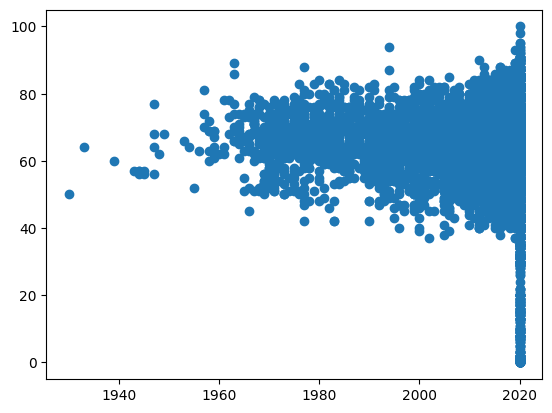

In [26]:
from matplotlib import pyplot as plt

plt.scatter(x, y)


In [27]:
def custom_scatter(df, x_label, y_label):
    try:
        float(df[x_label][0])
    except:
        return
    try:
        float(df[y_label][0])
    except:
        return
    plt.scatter(df[x_label], df[y_label], s=3, alpha=0.5)
    plt.xlabel(x_label)
    plt.ylabel(y_label)


In [28]:
new_df[new_df['tempo'] == 0]
df_zeros_removed = new_df[new_df['tempo'] != 0]
df_zeros_removed = df_zeros_removed[df_zeros_removed['speechiness'] != 0]
df_zeros_removed

,song_link,id,release_year,duration_ms.x,explicit,name,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,https://open.spotify.com/track/000xQL6tZNLJzIr...,000xQL6tZNLJzIrtIgxqSl,2017,188490,FALSE,Still Got Time (feat. PARTYNEXTDOOR),63.0,0.748,0.627,7.0,-6.029,1.0,0.0639,0.13100,0.000000,0.0852,0.5240,120.963,4.0
1,https://open.spotify.com/track/001UkMQHw4zXfFN...,001UkMQHw4zXfFNdKpwXAF,2019,191053,FALSE,Brand New Man - with Luke Combs,68.0,0.573,0.846,7.0,-4.866,1.0,0.0344,0.00372,0.000079,0.2900,0.5620,127.061,4.0
5,https://open.spotify.com/track/007EFIByaEW4dgE...,007EFIByaEW4dgEcIbfBg9,2018,170626,FALSE,Hasta Que un d√≠,58.0,0.684,0.564,10.0,-6.852,1.0,0.0297,0.42500,0.000000,0.1520,0.3680,134.958,4.0
7,https://open.spotify.com/track/009thiR2SWpG6jX...,009thiR2SWpG6jXqXYX2AT,2020,152784,FALSE,Cuantas Amantes,53.0,0.754,0.169,4.0,-14.999,0.0,0.0540,0.96500,0.872000,0.1140,0.4220,93.952,4.0
8,https://open.spotify.com/track/00bOuKgzbRkOHmg...,00bOuKgzbRkOHmgCAL7ChZ,2019,271680,FALSE,Zoning,50.0,0.629,0.877,7.0,-4.642,1.0,0.0402,0.02890,0.408000,0.1060,0.0369,104.978,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19328,https://open.spotify.com/track/7zTTDkkLkJ2iHAq...,7zTTDkkLkJ2iHAqq1daDCr,2019,226005,FALSE,OUTTA MY MIND,64.0,0.689,0.463,2.0,-8.121,0.0,0.0365,0.06600,0.000152,0.1450,0.8640,86.998,4.0
19330,https://open.spotify.com/track/7zVCrzzEJU7u24s...,7zVCrzzEJU7u24sbJPXA5W,2016,188253,FALSE,What Ifs (feat. Lauren Alaina),74.0,0.612,0.799,10.0,-4.603,1.0,0.0275,0.00898,0.000000,0.1720,0.6870,125.976,4.0
19331,https://open.spotify.com/track/7zwn1eykZtZ5LOD...,7zwn1eykZtZ5LODrf7c0tS,2018,153000,FALSE,You Get Me So High,67.0,0.551,0.881,7.0,-6.099,0.0,0.0542,0.18600,0.079100,0.1520,0.3870,88.036,4.0
19333,https://open.spotify.com/track/7zY8YswnsfvcHk4...,7zY8YswnsfvcHk4Xshhelm,2020,264840,FALSE,Zen Island,40.0,0.652,0.576,7.0,-7.120,1.0,0.0312,0.27500,0.000000,0.2420,0.4720,75.990,4.0


mode popularity


TypeError: 'value' must be an instance of str or bytes, not a float

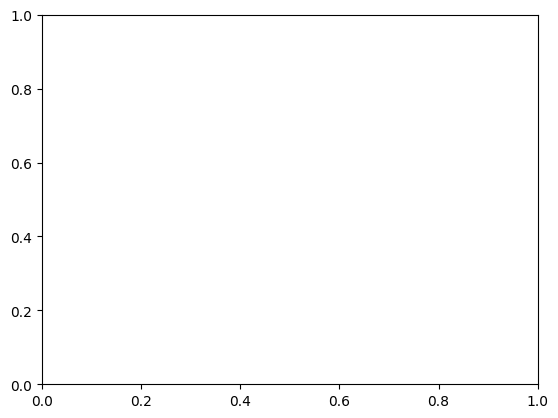

In [29]:
bad_labels = ['id', 'song_link']
x_label = bad_labels[0]
y_label = bad_labels[0]
while ((x_label in bad_labels) or (y_label in bad_labels)) or (x_label == y_label):
    x_label = random.choice(df_zeros_removed.columns)
    y_label = random.choice(df_zeros_removed.columns)
print(x_label, y_label)
custom_scatter(df, x_label, y_label)

histograms

In [ ]:
new_df['popularity']
plt.hist(new_df[new_df['release_year'] == 2020]['popularity'])
plt.title("2020 Song Popularity")

In [ ]:
def get_random_underground():
    temp = new_df[new_df['popularity'] < 50]
    temp = temp[temp['release_year'] != 2020]
    print(f'Choosing from {len(temp)} options')
    return temp.iloc[random.randint(0, len(temp) - 1)]['song_link']

In [ ]:
get_random_underground()